# Requirements

In [13]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt

# Configuration

In [21]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [22]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

In [23]:
# Navigate to a web page.
browser.get('https://www.apple.com/mk/')

In [24]:
# Select an element from the page.
element = browser.find_element(By.CLASS_NAME, 'headline')

In [25]:
# Print the element's innner text.
print(element.text)

iPhone 16 Pro


# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping on the website https://books.toscrape.com/. Your task includes the extraction of book titles and prices for a minimum of 20 books from this website. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of book prices.

## Solution

In [26]:
driver = webdriver.Chrome(options=options)

titles = []
prices = []

for page in range(1, 51):
 url = f"https://books.toscrape.com/catalogue/page-{page}.html"
 driver.get(url)

 books = driver.find_elements(By.CLASS_NAME, 'product_pod')

 for book in books:
  title = book.find_element(By.TAG_NAME, 'h3').text
  price = book.find_element(By.CLASS_NAME, 'price_color').text
  titles.append(title)
  price = float(price[1:])
  prices.append(price)

driver.quit()

df = pd.DataFrame({
    'Title' : titles,
    'Price' : prices
  })

df





,Title,Price
0,A Light in the ...,51.77
1,Tipping the Velvet,53.74
2,Soumission,50.10
3,Sharp Objects,47.82
4,Sapiens: A Brief History ...,54.23
...,...,...
995,Alice in Wonderland (Alice's ...,55.53
996,"Ajin: Demi-Human, Volume 1 ...",57.06
997,A Spy's Devotion (The ...,16.97
998,1st to Die (Women's ...,53.98


In [19]:
df.to_csv('book_to_scrape_title_price.csv', index = False)

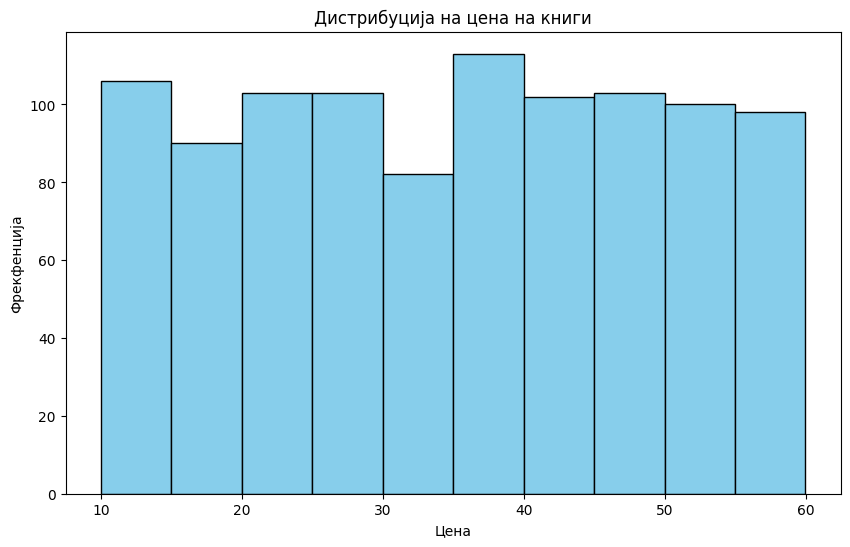

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Цена')
plt.ylabel('Фрекфенција')
plt.title('Дистрибуција на цена на книги')
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

As an additional task, you will need to click on each book listed on the page, proceed to the individual page for each book, and extract the quantity of available copies. Subsequently, you are required to compute both the mean and standard deviation of the quantities of these books.

## Hints
- To click on a specific `element` on a web page use `element.click()`.
- To navigate back to the previous page use `browser.back()`.

## Solution

In [27]:
driver = webdriver.Chrome(options=options)


titles = []
prices = []
quantities = []


for page in range(1, 51):
    url = f"https://books.toscrape.com/catalogue/page-{page}.html"
    driver.get(url)

    books = driver.find_elements(By.CLASS_NAME, 'product_pod')

    for book in books:
        title = book.find_element(By.TAG_NAME, 'h3').text
        price = book.find_element(By.CLASS_NAME, 'price_color').text
        titles.append(title)
        price = float(price[1:])
        prices.append(price)

        book.find_element(By.CSS_SELECTOR, 'h3 a').click()
        quantity_text = driver.find_element(By.CSS_SELECTOR, '.instock.availability').text
        quantity = int(quantity_text.split('(')[1].split()[0])
        quantities.append(quantity)
        driver.back()

driver.quit()

df = pd.DataFrame({
    'Title': titles,
    'Price': prices,
    'Quantity': quantities
})

df


,Title,Price,Quantity
0,A Light in the ...,51.77,22
1,Tipping the Velvet,53.74,20
2,Soumission,50.10,20
3,Sharp Objects,47.82,20
4,Sapiens: A Brief History ...,54.23,20
...,...,...,...
995,Alice in Wonderland (Alice's ...,55.53,1
996,"Ajin: Demi-Human, Volume 1 ...",57.06,1
997,A Spy's Devotion (The ...,16.97,1
998,1st to Die (Women's ...,53.98,1


In [28]:
mean_quantity = df['Quantity'].mean()
std_quantity = df['Quantity'].std()

print(f"Mean is: {mean_quantity}")
print(f"Standard deviation is: {std_quantity}")

Mean is: 8.585
Standard deviation is: 5.654621981153932
